# Belajar Pengembangan Machine Learning - Proyek Pertama_Membuat Model NLP

## Data Diri

Nama : Adi Bintang Pradana <br>
Alamat : Jl. Budi Mulia No. 1, Jakarta <br>
No. HP : 087784537428 <br>
Email : adibintangprada@gmail.com

## Import Library

In [1]:
import pandas as pd

## Load Dataset

In [2]:
df = pd.read_csv('dataset_review_tokped_labelled.csv')
df.head()

,Review,Rating,Sentiment
0,enak kuacinya,5,positive
1,pengiriman cepat packing bagus sesuai pesanan ...,5,positive
2,pengemasan luar biasa baik untuk rasa menurut ...,4,negative
3,terimakasih min,5,neutral
4,udah order untuk kesekian kali jos,5,neutral


## Data Cleaning and Preprocessing

In [3]:
df = df.drop(columns=['Rating'])

In [4]:
df

,Review,Sentiment
0,enak kuacinya,positive
1,pengiriman cepat packing bagus sesuai pesanan ...,positive
2,pengemasan luar biasa baik untuk rasa menurut ...,negative
3,terimakasih min,neutral
4,udah order untuk kesekian kali jos,neutral
...,...,...
4055,seller sangat responsif rasa belum dicoba kare...,neutral
4056,imut2 banget packing aman,positive
4057,good product trusted seller,positive
4058,sudah beli yg ke 3,neutral


In [5]:
label = pd.get_dummies(df.Sentiment)
df_baru = pd.concat([df, label], axis=1)
df_baru = df_baru.drop(columns='Sentiment')
df_baru

,Review,negative,neutral,positive
0,enak kuacinya,0,0,1
1,pengiriman cepat packing bagus sesuai pesanan ...,0,0,1
2,pengemasan luar biasa baik untuk rasa menurut ...,1,0,0
3,terimakasih min,0,1,0
4,udah order untuk kesekian kali jos,0,1,0
...,...,...,...,...
4055,seller sangat responsif rasa belum dicoba kare...,0,1,0
4056,imut2 banget packing aman,0,0,1
4057,good product trusted seller,0,0,1
4058,sudah beli yg ke 3,0,1,0


## Modelling - LSTM

### Train Test Split

In [6]:
x = df_baru['Review'].values
y = df_baru[['negative', 'neutral', 'positive']].values

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Build Model

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(x_train) 
tokenizer.fit_on_texts(x_test)
 
sequence_train = tokenizer.texts_to_sequences(x_train)
sequence_test = tokenizer.texts_to_sequences(x_test)
 
padded_train = pad_sequences(sequence_train) 
padded_test = pad_sequences(sequence_test)

In [13]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history = model.fit(padded_train, y_train, epochs=30, 
                    validation_data=(padded_test, y_test), verbose=2)

Epoch 1/30
102/102 - 13s - loss: 0.7976 - accuracy: 0.7124 - val_loss: 0.6812 - val_accuracy: 0.7192
Epoch 2/30
102/102 - 12s - loss: 0.5249 - accuracy: 0.7891 - val_loss: 0.6226 - val_accuracy: 0.7525
Epoch 3/30
102/102 - 12s - loss: 0.3793 - accuracy: 0.8467 - val_loss: 0.6097 - val_accuracy: 0.7648
Epoch 4/30
102/102 - 12s - loss: 0.2866 - accuracy: 0.8950 - val_loss: 0.6851 - val_accuracy: 0.7537
Epoch 5/30
102/102 - 11s - loss: 0.2210 - accuracy: 0.9233 - val_loss: 0.7850 - val_accuracy: 0.7635
Epoch 6/30
102/102 - 12s - loss: 0.1616 - accuracy: 0.9452 - val_loss: 0.9058 - val_accuracy: 0.7266
Epoch 7/30
102/102 - 12s - loss: 0.1255 - accuracy: 0.9643 - val_loss: 1.0005 - val_accuracy: 0.7722
Epoch 8/30
102/102 - 13s - loss: 0.0968 - accuracy: 0.9701 - val_loss: 1.1335 - val_accuracy: 0.7537
Epoch 9/30
102/102 - 14s - loss: 0.0849 - accuracy: 0.9732 - val_loss: 0.9634 - val_accuracy: 0.7438
Epoch 10/30
102/102 - 12s - loss: 0.0790 - accuracy: 0.9757 - val_loss: 1.0762 - val_accura

### Model Visualization

In [15]:
import matplotlib.pyplot as plt

#### Model Loss

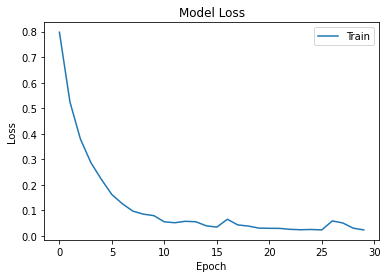

In [20]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

#### Model Accuracy

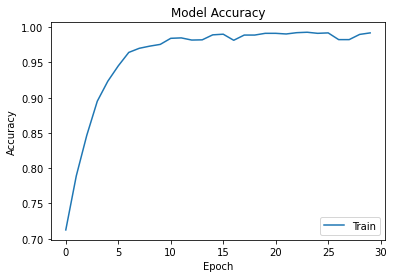

In [21]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()